# Análise de Incêndios Florestais
Análise de dados sobre incêndios florestais no noroeste de Portugal utilizando python, a biblioteca pandas e matplotlib.

# Importando as bibliotecas e importando os dados

In [1]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

In [2]:
# Lendo o arquivo csv escolhido
dg = pd.read_csv('forestfires.csv')

# Visualisando os dados importados

In [3]:
# Printando o começo do arquivo para testar
dg.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Removendo colunas dos dados que não utilizaremos

In [4]:
# Removendo Colunas que não serão usadas
dg = dg.drop(columns=['FFMC', 'DMC', 'DC', 'ISI'])
dg.head()

,X,Y,month,day,temp,RH,wind,rain,area
0,7,5,mar,fri,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,11.4,99,1.8,0.0,0.0


# Quantidade de ocorrências por mês

In [5]:
por_mes = dg['month'].value_counts()
por_mes

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

# Gerando um gráfico com os dados obtidos por mês

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text xticklabel objects>)

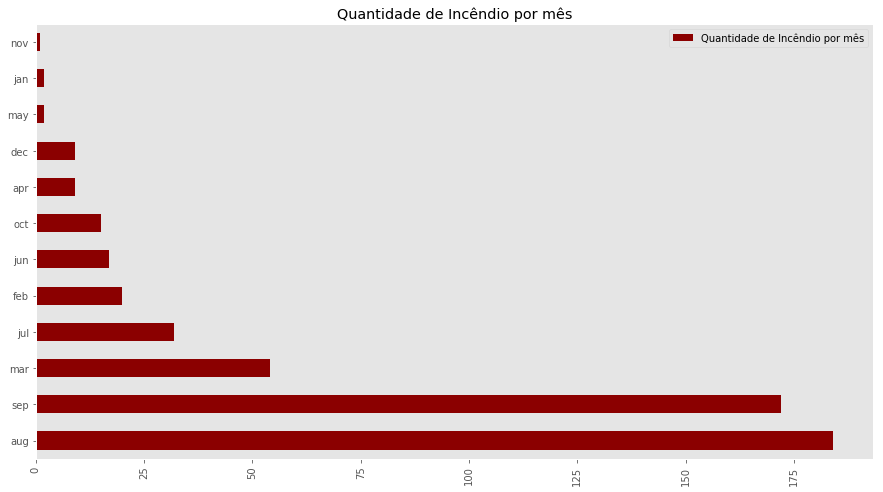

In [6]:
plt.style.use("ggplot")
a = dg['month'].value_counts().sort_values(ascending=[False])
# Label == nome do título
# Subplots se refere ao título (True, False)
a.plot(kind='barh', subplots=True, label="Quantidade de Incêndio por mês" ,figsize=(15, 8), grid=False, color='darkred', legend=True)
plt.xticks(rotation=90)

# RH = Umidade Relativa do ar em % 

In [7]:
dg['RH'].value_counts().head(n=20)

27    33
39    24
35    20
43    17
42    17
45    16
34    16
40    15
33    15
46    14
24    13
44    13
32    12
51    12
28    11
41    11
38    11
53    11
25    10
54     9
Name: RH, dtype: int64

# Abaixo podemos ver que a umidade nos meses com mais queimas não são as menores

In [8]:
por_umidade = dg.groupby('month').mean()['RH'].sort_values(ascending=False)
por_umidade

month
jan    89.000000
may    67.000000
feb    55.700000
apr    46.888889
aug    45.489130
jul    45.125000
jun    45.117647
sep    42.843023
mar    40.000000
dec    38.444444
oct    37.466667
nov    31.000000
Name: RH, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

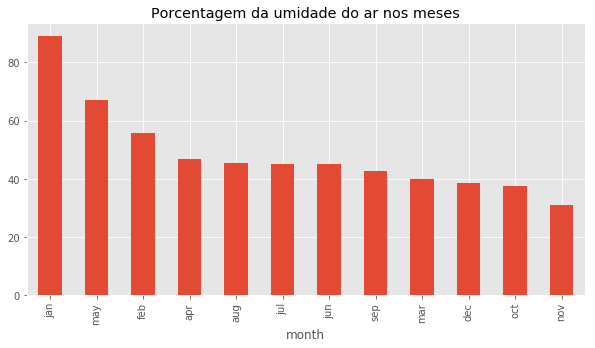

In [9]:
plt.style.use("ggplot")
por_umidade.plot(kind='bar', subplots=True, label="Porcentagem da umidade do ar nos meses" ,figsize=(10, 5))
plt.xticks(rotation=90)

In [10]:
dg['wind'].value_counts().head(n=20)


2.2    53
3.1    53
4.0    51
4.9    48
2.7    44
4.5    41
5.4    41
3.6    40
1.8    31
5.8    24
6.3    19
7.6    14
1.3    14
0.9    13
6.7     8
8.5     8
8.0     5
7.2     4
9.4     4
8.9     1
Name: wind, dtype: int64

In [11]:
temp_por_mes = dg.groupby('month').mean()['wind'].sort_values(ascending=False)
temp_por_mes

month
dec    7.644444
mar    4.968519
apr    4.666667
nov    4.500000
may    4.450000
jun    4.135294
aug    4.086413
feb    3.755000
jul    3.734375
sep    3.557558
oct    3.460000
jan    2.000000
Name: wind, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

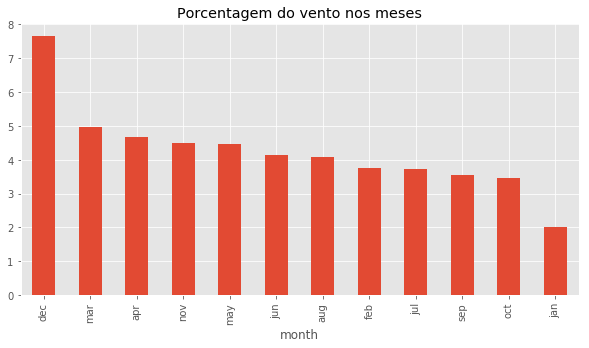

In [12]:
plt.style.use("ggplot")
temp_por_mes.plot(kind='bar', subplots=True, label="Porcentagem do vento nos meses" ,figsize=(10, 5))
plt.xticks(rotation=90)